In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
def print_metrics(y_true, y_pred):
    print ("Precision: %.4f" % (precision_score(y_true, y_pred)))
    print ("Recall: %.4f" % (recall_score(y_true, y_pred)))
    print ("F1: %.4f" % (f1_score(y_true, y_pred)))
    print ("Confusion matrix:")
    print (confusion_matrix(y_true, y_pred))
    return


def aucpr(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    indices = np.argsort(precision)
    precision = precision[indices]
    recall = recall[indices]
    return auc(precision, recall)


def evaluate(y_train, y_test, y_train_pred, y_test_pred, y_train_pred_dropV, y_test_pred_dropV):
    if len(y_train_pred) > 0:
        train_prec.append(precision_score(y_train, y_train_pred))
        train_rec.append(recall_score(y_train, y_train_pred))
        train_f1.append(f1_score(y_train, y_train_pred))
        train_aucpr.append(aucpr(y_train, y_train_pred))
    
    if len(y_train_pred_dropV) > 0:
        train_prec_dropV.append(precision_score(y_train, y_train_pred_dropV))
        train_rec_dropV.append(recall_score(y_train, y_train_pred_dropV))
        train_f1_dropV.append(f1_score(y_train, y_train_pred_dropV))
        train_aucpr_dropV.append(aucpr(y_train, y_train_pred_dropV))
    
    test_prec.append(precision_score(y_test, y_test_pred))
    test_rec.append(recall_score(y_test, y_test_pred))
    test_f1.append(f1_score(y_test, y_test_pred))
    test_aucpr.append(aucpr(y_test, y_test_pred))
    
    test_prec_dropV.append(precision_score(y_test, y_test_pred_dropV))
    test_rec_dropV.append(recall_score(y_test, y_test_pred_dropV))
    test_f1_dropV.append(f1_score(y_test, y_test_pred_dropV))
    test_aucpr_dropV.append(aucpr(y_test, y_test_pred_dropV))
    

def draw(x, x_label, mv_gaussian=False):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))    
    if not mv_gaussian:
        axes[0][0].plot(x, train_prec, label='train without dropping features')
        axes[0][0].plot(x, test_prec, label='test without dropping features')
        axes[0][0].plot(x, train_prec_dropV, label='train with dropping features')
        axes[0][0].plot(x, test_prec_dropV, label='test with dropping features')

        axes[0][1].plot(x, train_rec, label='train without dropping features')
        axes[0][1].plot(x, test_rec, label='test without dropping features')
        axes[0][1].plot(x, train_rec_dropV, label='train with dropping features')
        axes[0][1].plot(x, test_rec_dropV, label='test with dropping features')

        axes[1][0].plot(x, train_f1, label='train without dropping features')
        axes[1][0].plot(x, test_f1, label='test without dropping features')
        axes[1][0].plot(x, train_f1_dropV, label='train with dropping features')
        axes[1][0].plot(x, test_f1_dropV, label='test with dropping features')

        axes[1][1].plot(x, train_aucpr, label='train without dropping features')
        axes[1][1].plot(x, test_aucpr, label='test without dropping features')
        axes[1][1].plot(x, train_aucpr_dropV, label='train with dropping features')
        axes[1][1].plot(x, test_aucpr_dropV, label='test with dropping features')
        
        fig.suptitle("train and test with or without dropping features")
    else:
        axes[0][0].semilogx(x, test_prec, label='test without dropping features')
        axes[0][0].semilogx(x, test_prec_dropV, label='test with dropping features')

        axes[0][1].semilogx(x, test_rec, label='test without dropping features')
        axes[0][1].semilogx(x, test_rec_dropV, label='test with dropping features')

        axes[1][0].semilogx(x, test_f1, label='test without dropping features')
        axes[1][0].semilogx(x, test_f1_dropV, label='test with dropping features')

        axes[1][1].semilogx(x, test_aucpr, label='test without dropping features')
        axes[1][1].semilogx(x, test_aucpr_dropV, label='test with dropping features')
        
        fig.suptitle("test with or without dropping features")
        
    axes[0][0].set_ylabel("Precision")
    axes[0][0].set_xlabel(x_label)
    axes[0][0].legend()
    axes[0][1].set_ylabel("Recall")
    axes[0][1].set_xlabel(x_label)
    axes[0][1].legend()
    axes[1][0].set_ylabel("F1")
    axes[1][0].set_xlabel(x_label)
    axes[1][0].legend()
    axes[1][1].set_ylabel("AUCPR")
    axes[1][1].set_xlabel(x_label)
    axes[1][1].legend()
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Feature Engineering

In [3]:
data = pd.read_csv('data/creditcard.csv')
data.drop(['Time', 'Amount'], axis=1, inplace=True)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

rf = RandomForestClassifier(n_estimators=100 , criterion='entropy', n_jobs=3, random_state=0)
rf.fit(X, y)
sorted(zip(rf.feature_importances_, X.columns), key=lambda x: -x[0])

[(0.18240053481425814, 'V17'),
 (0.14446696639991408, 'V14'),
 (0.13234432564343263, 'V12'),
 (0.10144749886503578, 'V10'),
 (0.07745576059833321, 'V11'),
 (0.042240973230260374, 'V16'),
 (0.0389204552302894, 'V4'),
 (0.03744517002582191, 'V3'),
 (0.029923253055630834, 'V7'),
 (0.027871587945440472, 'V9'),
 (0.020816197155352326, 'V18'),
 (0.012702062204011521, 'V19'),
 (0.01204392865413024, 'V8'),
 (0.01195397426630823, 'V21'),
 (0.011785187869373942, 'V26'),
 (0.011574249107405848, 'V20'),
 (0.011004386133911468, 'V1'),
 (0.01059821400203368, 'V27'),
 (0.009946781922962153, 'V2'),
 (0.008923898903588605, 'V6'),
 (0.008809189891428816, 'V28'),
 (0.008688311090286938, 'V15'),
 (0.008686891678194057, 'V5'),
 (0.008595315312412704, 'V13'),
 (0.007961248826809937, 'V22'),
 (0.007293445325850915, 'V25'),
 (0.007090864756069252, 'V23'),
 (0.007009327091452588, 'V24')]

## We will compare the performance of dropping following features for all algorithms below

['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24']

## Baseline of Supervised learning (Undersampling+LR)

In [4]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv', names=['Class'])
y_test = pd.read_csv('data/y_test.csv', names=['Class'])

X_train.drop(['Time'], axis=1, inplace=True)
X_test.drop(['Time'], axis=1, inplace=True)

scaler = StandardScaler()
X_train['normAmount'] = scaler.fit_transform(np.array(X_train['Amount']).reshape(-1, 1))
X_test['normAmount'] = scaler.transform(np.array(X_test['Amount']).reshape(-1, 1))

X_train.drop(['Amount'], axis=1, inplace=True)
X_test.drop(['Amount'], axis=1, inplace=True)

# drop features with low feature importances
X_train_dropV = X_train.drop(['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24'], axis=1)
X_test_dropV = X_test.drop(['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24'], axis=1)

#### Train on undersampling data and predict

In [ ]:
np.random.seed(1234)
normal_indices = y_train[y_train['Class']==0].index
fraud_indices = y_train[y_train['Class']==1].index
num_fraud = len(fraud_indices)
random_normal_indices = np.random.choice(normal_indices, num_fraud, replace=False)
undersample_indices = np.concatenate([fraud_indices, random_normal_indices])

undersample_X_train = X_train.iloc[undersample_indices, :]
undersample_X_train_dropV = X_train_dropV.iloc[undersample_indices, :]
undersample_y_train = y_train.iloc[undersample_indices, :]

lr = LogisticRegression(C=0.01, solver='lbfgs')
lr.fit(undersample_X_train, undersample_y_train)
y_train_score = lr.predict_proba(X_train)[:, 1]
y_test_score = lr.predict_proba(X_test)[:, 1]

lr_dropV = LogisticRegression(C=0.01, solver='lbfgs')
lr_dropV.fit(undersample_X_train_dropV, undersample_y_train)
y_train_score_dropV = lr_dropV.predict_proba(X_train_dropV)[:, 1]
y_test_score_dropV = lr_dropV.predict_proba(X_test_dropV)[:, 1]

#### Tuning on decision function threshold

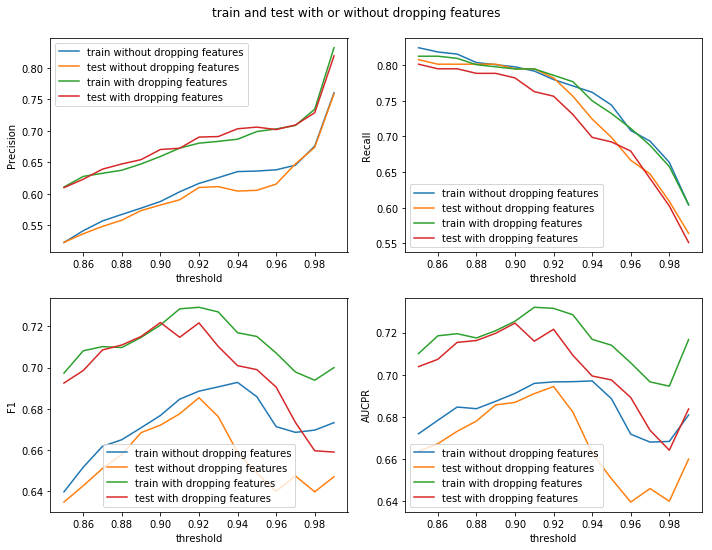

In [ ]:
train_prec = []
test_prec = []
train_rec = []
test_rec = []
train_f1 = []
test_f1 = []
train_aucpr = []
test_aucpr = []

train_prec_dropV = []
test_prec_dropV = []
train_rec_dropV = []
test_rec_dropV = []
train_f1_dropV = []
test_f1_dropV = []
train_aucpr_dropV = []
test_aucpr_dropV = []

for threshold in np.arange(0.85, 0.99, 0.01):
    y_train_pred = np.array([sc>threshold for sc in y_train_score], dtype=int)
    y_test_pred = np.array([sc>threshold for sc in y_test_score], dtype=int)
    y_train_pred_dropV = np.array([sc>threshold for sc in y_train_score_dropV], dtype=int)
    y_test_pred_dropV = np.array([sc>threshold for sc in y_test_score_dropV], dtype=int)

    evaluate(y_train, y_test, y_train_pred, y_test_pred, y_train_pred_dropV, y_test_pred_dropV)
    
draw(np.arange(0.85, 0.99, 0.01), 'threshold')

## Local Outlier Factor

#### Tuning on number of neighbors

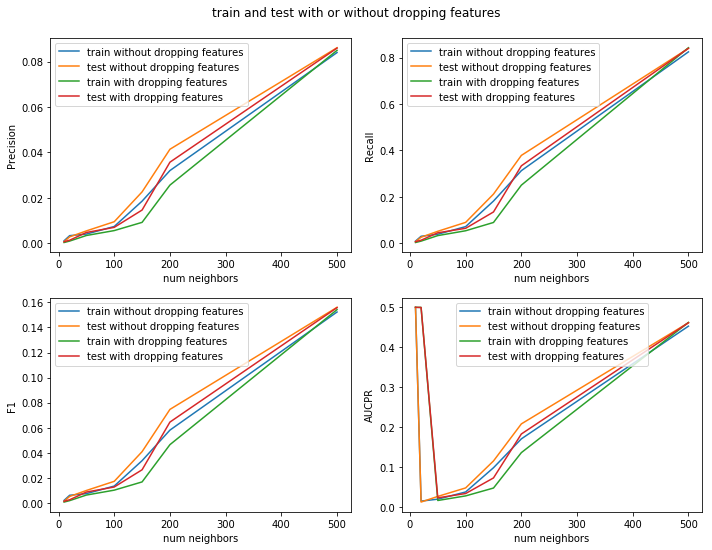

In [ ]:
train_prec = []
test_prec = []
train_rec = []
test_rec = []
train_f1 = []
test_f1 = []
train_aucpr = []
test_aucpr = []

train_prec_dropV = []
test_prec_dropV = []
train_rec_dropV = []
test_rec_dropV = []
train_f1_dropV = []
test_f1_dropV = []
train_aucpr_dropV = []
test_aucpr_dropV = []

for neigh in [10, 20, 50, 100, 150, 200]:
    lof = LocalOutlierFactor(n_neighbors=neigh, algorithm='auto', metric='euclidean', contamination=0.0168, novelty=True, n_jobs=3)
    lof.fit(X_train)
    
    y_train_pred = lof.predict(X_train)
    y_test_pred = lof.predict(X_test)
    y_train_pred = np.array([pred==-1 for pred in y_train_pred], dtype=int)
    y_test_pred = np.array([pred==-1 for pred in y_test_pred], dtype=int)
    
    lof_dropV = LocalOutlierFactor(n_neighbors=neigh, algorithm='auto', metric='euclidean', contamination=0.0168, novelty=True, n_jobs=3)
    lof_dropV.fit(X_train_dropV)
    
    y_train_pred_dropV = lof_dropV.predict(X_train_dropV)
    y_test_pred_dropV = lof_dropV.predict(X_test_dropV)
    y_train_pred_dropV = np.array([pred==-1 for pred in y_train_pred_dropV], dtype=int)
    y_test_pred_dropV = np.array([pred==-1 for pred in y_test_pred_dropV], dtype=int)
    
    evaluate(y_train, y_test, y_train_pred, y_test_pred, y_train_pred_dropV, y_test_pred_dropV)
    
draw([10, 20, 50, 100, 150, 200], 'num neighbors')

## One-Class SVM

#### Tuning on gamma

In [ ]:
train_prec = []
test_prec = []
train_rec = []
test_rec = []
train_f1 = []
test_f1 = []
train_aucpr = []
test_aucpr = []

train_prec_dropV = []
test_prec_dropV = []
train_rec_dropV = []
test_rec_dropV = []
train_f1_dropV = []
test_f1_dropV = []
train_aucpr_dropV = []
test_aucpr_dropV = []

for ga in np.arange(0.1, 1, 0.2):
    ocsvm = OneClassSVM(gamma=ga, nu=0.5)
    ocsvm.fit(X_train)

    y_train_pred = ocsvm.predict(X_train)
    y_test_pred = ocsvm.predict(X_test)
    y_train_pred = np.array([pred==-1 for pred in y_train_pred], dtype=int)
    y_test_pred = np.array([pred==-1 for pred in y_test_pred], dtype=int)
    
    ocsvm_dropV = OneClassSVM(gamma=ga, nu=0.5)
    ocsvm_dropV.fit(X_train_dropV)

    y_train_pred_dropV = ocsvm_dropV.predict(X_train_dropV)
    y_test_pred_dropV = ocsvm_dropV.predict(X_test_dropV)
    y_train_pred_dropV = np.array([pred==-1 for pred in y_train_pred_dropV], dtype=int)
    y_test_pred_dropV = np.array([pred==-1 for pred in y_test_pred_dropV], dtype=int)
    
    evaluate(y_train, y_test, y_train_pred, y_test_pred, y_train_pred_dropV, y_test_pred_dropV)
    
draw(np.arange(0.1, 1, 0.2), 'gamma')

## Isolation Forest

#### Construct dataset without dropping or scaling 'Amount'

In [ ]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv', names=['Class'])
y_test = pd.read_csv('data/y_test.csv', names=['Class'])

X_train.drop(['Time'], axis=1, inplace=True)
X_test.drop(['Time'], axis=1, inplace=True)

# drop features with low feature importances
X_train_dropV = X_train.drop(['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24'], axis=1)
X_test_dropV = X_test.drop(['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24'], axis=1)

#### Tuning on max samples

In [ ]:
train_prec = []
test_prec = []
train_rec = []
test_rec = []
train_f1 = []
test_f1 = []
train_aucpr = []
test_aucpr = []

train_prec_dropV = []
test_prec_dropV = []
train_rec_dropV = []
test_rec_dropV = []
train_f1_dropV = []
test_f1_dropV = []
train_aucpr_dropV = []
test_aucpr_dropV = []

for ms in np.arange(0.1, 1, 0.1):
    isof = IsolationForest(n_estimators=200, contamination=0.0168, behaviour='new', max_samples=ms, n_jobs=3, random_state=0)
    isof.fit(X_train)
    
    y_train_pred = isof.predict(X_train)
    y_test_pred = isof.predict(X_test)
    y_train_pred = np.array([pred==-1 for pred in y_train_pred], dtype=int)
    y_test_pred = np.array([pred==-1 for pred in y_test_pred], dtype=int)
    
    isof_dropV = IsolationForest(n_estimators=200, contamination=0.0168, behaviour='new', max_samples=ms, n_jobs=3, random_state=0)
    isof_dropV.fit(X_train_dropV)
    
    y_train_pred_dropV = isof_dropV.predict(X_train_dropV)
    y_test_pred_dropV = isof_dropV.predict(X_test_dropV)
    y_train_pred_dropV = np.array([pred==-1 for pred in y_train_pred_dropV], dtype=int)
    y_test_pred_dropV = np.array([pred==-1 for pred in y_test_pred_dropV], dtype=int)
    
    evaluate(y_train, y_test, y_train_pred, y_test_pred, y_train_pred_dropV, y_test_pred_dropV)
    
draw(np.arange(0.1, 1, 0.1), 'max_samples')

## Multivariate Gaussian

In [ ]:
class MultiVariateGaussian(object):
    
    def __init__(self, data):
        self.mu = np.mean(data, axis=0)
        self.sigma = np.cov(data.T)
        self.model = multivariate_normal(mean=self.mu, cov=self.sigma)

    def predict(self, sample):
        return self.model.pdf(sample)

#### Extract 70% normal to train and 30% normal+100% fraud to test

In [ ]:
normal_indices = y_train[y_train['Class']==0].index
fraud_indices = y_train[y_train['Class']==1].index

# training set contains only normal
normal_X_train = X_train.iloc[normal_indices, :]

# test sert contains a part of normal and all fraud
fraud_X_train = X_train.iloc[fraud_indices, :]
X_test = pd.concat([X_test, fraud_X_train])
y_test = pd.concat([y_test, y_train[y_train['Class']==1]])

# drop features with low feature importances
normal_X_train_dropV = normal_X_train.drop(['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24'], axis=1)
X_test_dropV = X_test.drop(['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24'], axis=1)

#### Tuning on decision function threshold

In [ ]:
mn = MultiVariateGaussian(normal_X_train)
y_train_score = mn.predict(normal_X_train)
y_test_score = mn.predict(X_test)

mn_dropV = MultiVariateGaussian(normal_X_train_dropV)
y_train_score_dropV = mn_dropV.predict(normal_X_train_dropV)
y_test_score_dropV = mn_dropV.predict(X_test_dropV)

y_train = y_train[y_train['Class']==0]

In [ ]:
test_prec = []
test_rec = []
test_f1 = []
test_aucpr = []

test_prec_dropV = []
test_rec_dropV = []
test_f1_dropV = []
test_aucpr_dropV = []

for threshold in [1e-120, 1e-100, 1e-80, 1e-60, 1e-40, 1e-20, 1e-15, 1e-13, 1e-12]:
    y_test_pred = np.array([sc<=threshold for sc in y_test_score], dtype=int)
    y_test_pred_dropV = np.array([sc<=threshold for sc in y_test_score_dropV], dtype=int)
    
    evaluate(y_train, y_test, [], y_test_pred, [], y_test_pred_dropV)

draw([1e-120, 1e-100, 1e-80, 1e-60, 1e-40, 1e-20, 1e-15, 1e-13, 1e-12], 'threshold', True)